# Thermischer Zerfall von gasförmigem HI

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import stats
from scipy import constants as cnst
import numpy as np
import pandas as pd
import glob
import math
from IPython.display import HTML

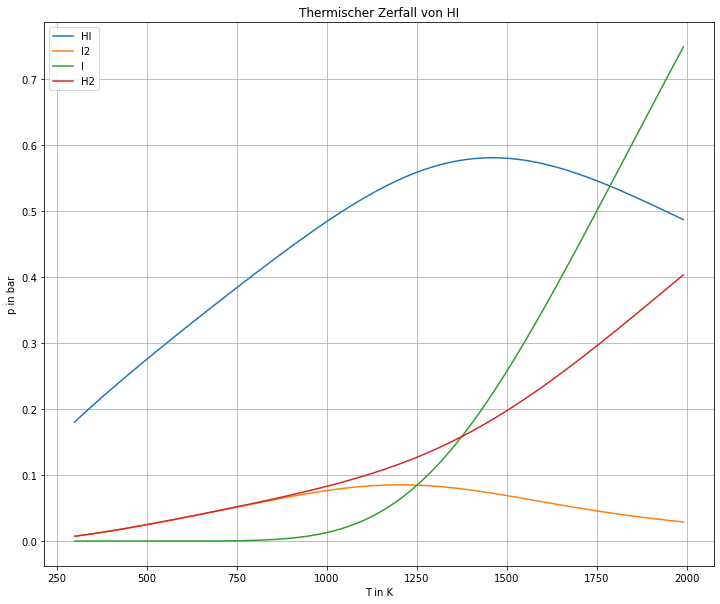

,T in K,p(HI) in bar,p(I2) in bar,p(I) in bar,p(H2) in bar
0,300,0.180,0.007,0.000,0.007
1,310,0.185,0.008,0.000,0.008
2,320,0.190,0.009,0.000,0.009
3,330,0.195,0.009,0.000,0.009
4,340,0.200,0.010,0.000,0.010
5,350,0.205,0.011,0.000,0.011
6,360,0.210,0.012,0.000,0.012
7,370,0.215,0.013,0.000,0.013
8,380,0.220,0.014,0.000,0.014
9,390,0.224,0.014,0.000,0.014


In [14]:
# Konstanten
R = cnst.R
h_1 = 10000
s_1 = -20
h_2 = 152000
s_2 = 101
M_HI = 128

# Eingesetzte Menge HI in Gramm und Volumen
m = 1     
v = 1

# Temperatur
temp = np.arange(300,2000,10)

# Arrays
l_HI = []
l_I2 = []
l_I1 = []
l_H =[]

for t in temp:
    p_0 = (m/M_HI)*R/100*t/v # Druck, R wird auf bar und Liter angepasst
    K_1 = np.exp(-h_1/(R*t)+s_1/R) # K Reaktion 1
    K_2 = np.exp(-h_2/(R*t)+s_2/R) # K Raektion 2
    
    # Startwerte für Iteration
    H = 1
    I_2 = 1
    
    # Iteration
    while True:
        while True:
            HI = np.sqrt(H*I_2/K_1)
            I_1 = np.sqrt(K_2*I_2)
            # Stoffmengenbilanz 1
            x_1 = HI + 2*H
            if (abs(p_0/x_1-1)<1e-6):
                break
            H = H*(p_0/x_1)**0.3
        # Stoffmengenbilanz 2
        x_2 = HI+2*I_2+I_1
        if(abs(p_0/x_2-1)<1e-6):
            break
        I_2 = I_2 * (p_0/x_2)**0.3
    l_HI.append(HI)
    l_I2.append(I_2)
    l_I1.append(I_1)
    l_H.append(H)
    
# Darstellung der Werte
fig = plt.figure(figsize=(12, 10)) 
plt.minorticks_on
plt.grid(True,which='both')
plt.xlabel('T in K')
plt.ylabel('p in bar')
plt.title('Thermischer Zerfall von HI')
plt.plot(temp,l_HI,temp,l_I2,temp,l_I1,temp,l_H)
plt.legend(['HI','I2','I','H2'])
plt.show()
fig.savefig('test.png')

# Daten in Tabellenform
df_T = pd.DataFrame(data=temp, columns=['T in K'])
df_HI = pd.DataFrame(data=l_HI,columns=['p(HI) in bar'])
df_I2 = pd.DataFrame(data=l_I2,columns=['p(I2) in bar'])
df_I = pd.DataFrame(data=l_I1,columns=['p(I) in bar'])
df_H2 = pd.DataFrame(data=l_H,columns=['p(H2) in bar'])
df = pd.concat([df_T,df_HI,df_I2,df_I,df_H2],axis=1)
display(HTML(df.round(3).to_html(index=True)))
df.to_csv('Test.csv')